In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
#print(torch._version_, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████▏                       | 179.4 MB 2.0 MB/s eta 0:04:23

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 879 kB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=a0b1326d48a0aa29e7a5c8df15f5552b5e15b8e7445baead8ce24980ec509453
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
Successfully built fvcore


In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13410, done.
remote: Counting objects: 100% (911/911), done.
remote: Compressing objects: 100% (462/462), done.
remote: Total 13410 (delta 570), reused 715 (delta 443), pack-reused 12499
Receiving objects: 100% (13410/13410), 5.73 MiB | 16.76 MiB/s, done.
Resolving deltas: 100% (9518/9518), done.


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!unzip "/content/drive/MyDrive/data.zip" -d "/content/"

Archive:  /content/drive/MyDrive/data.zip
   creating: /content/data/abc/
  inflating: /content/data/abc/abhinaya_tyre_word (1).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (1).json  
  inflating: /content/data/abc/abhinaya_tyre_word (10).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (10).json  
  inflating: /content/data/abc/abhinaya_tyre_word (11).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (11).json  
  inflating: /content/data/abc/abhinaya_tyre_word (12).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (12).json  
  inflating: /content/data/abc/abhinaya_tyre_word (19).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (19).json  
  inflating: /content/data/abc/abhinaya_tyre_word (2).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (2).json  
  inflating: /content/data/abc/abhinaya_tyre_word (20).jpg  
  inflating: /content/data/abc/abhinaya_tyre_word (20).json  
  inflating: /content/data/abc/abhinaya_tyre_word (21).jpg  
  inflat

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car", {}, "/content/data/trainval.json", "/content/data/abc")

In [ ]:
fruits_nuts_metadata = MetadataCatalog.get("car")

In [ ]:
fruits_nuts_metadata

Metadata(evaluator_type='coco', image_root='/content/data/abc', json_file='/content/data/trainval.json', name='car')

In [ ]:
dataset_dicts = DatasetCatalog.get("car")

WARNING [10/28 10:41:27 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/28 10:41:27 d2.data.datasets.coco]: Loaded 581 images in COCO format from /content/data/trainval.json


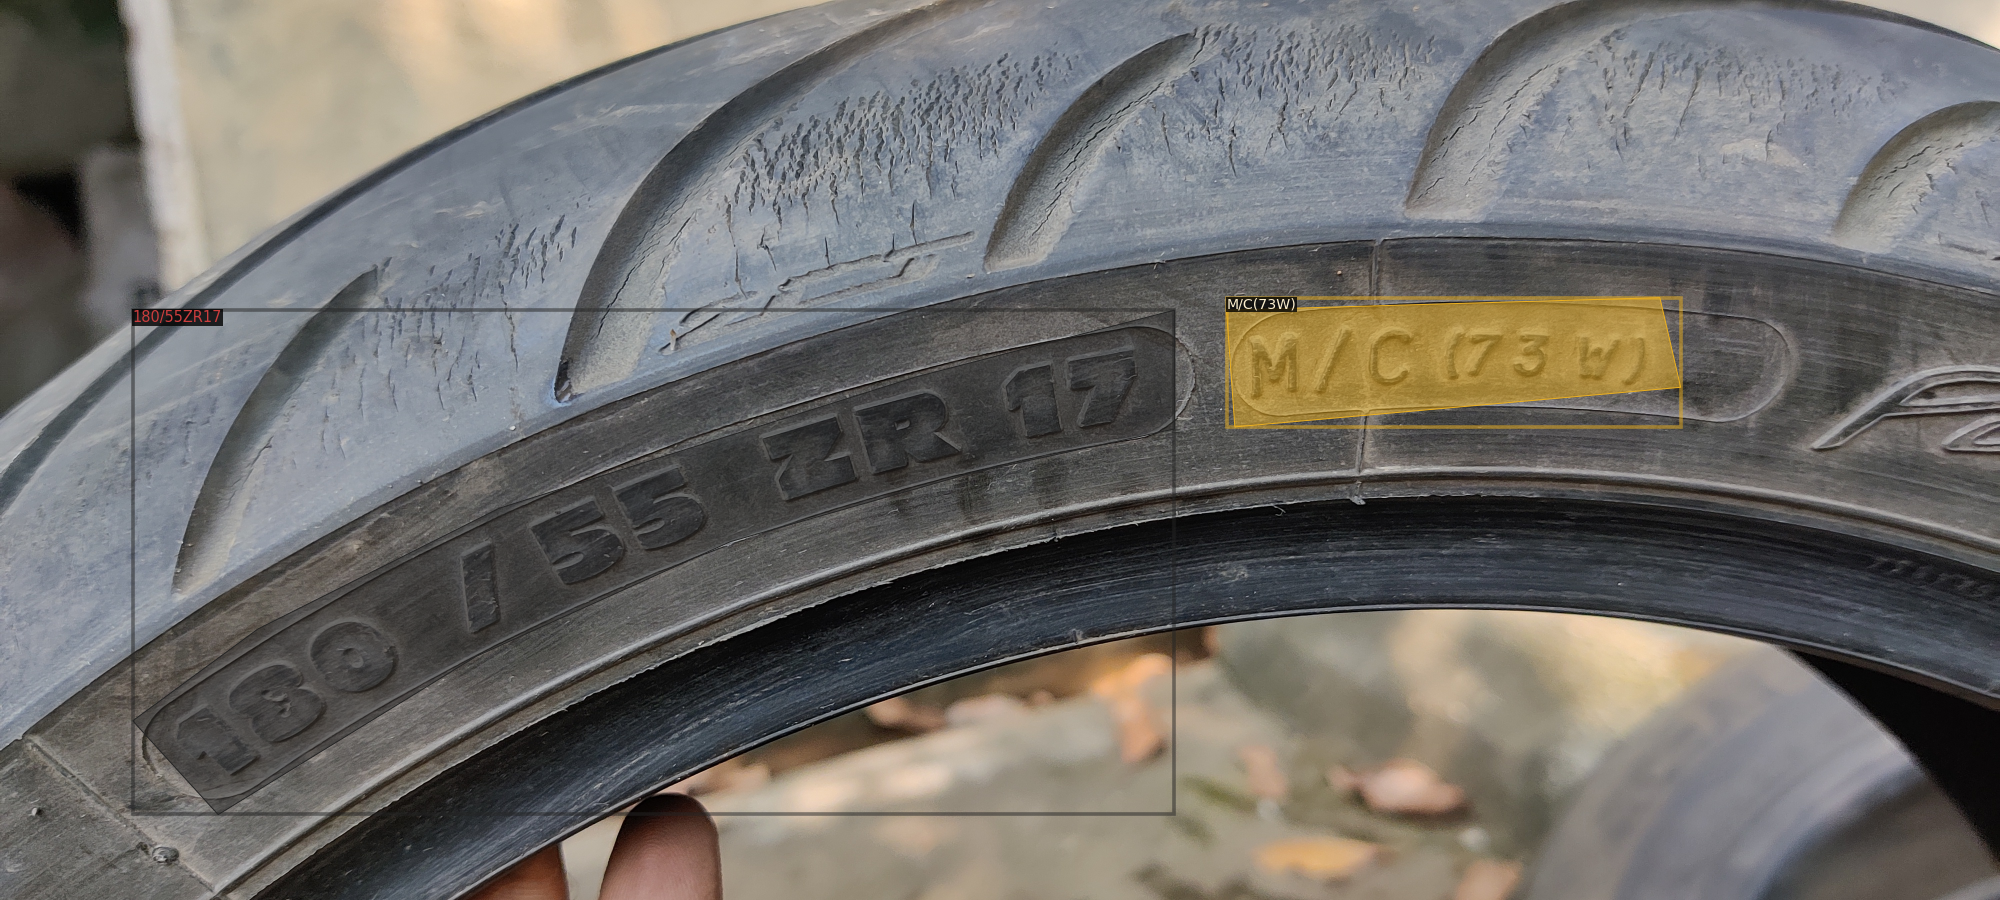

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(
    "./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml"
)
cfg.DATASETS.TRAIN = ("car",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2

cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/model_final_a2914c.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.01
cfg.SOLVER.MAX_ITER = (
     6000
)  # 6000 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    256
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 40  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

ModuleNotFoundError: ignored

In [ ]:
!cp /content/myfolder/myitem.txt /content/gdrive/MyDrive/mydrivefolder/